60000 28 28
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2490 - accuracy: 0.9244 - val_loss: 0.0654 - val_accuracy: 0.9803
Epoch 2/10
48000/48000 [==============================] - 85s 2ms/step - loss: 0.0920 - accuracy: 0.9733 - val_loss: 0.0489 - val_accuracy: 0.9856
Epoch 3/10
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 4/10
48000/48000 [==============================] - 86s 2ms/step - loss: 0.0547 - accuracy: 0.9837 - val_loss: 0.0428 - val_accuracy: 0.9877
Epoch 5/10
48000/48000 [==============================] - 90s 2ms/step - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.0411 - val_accuracy: 0.9895
Epoch 6/10
48000/48000 [==============================] - 89s 2ms/step - loss: 0.0454 - accuracy: 0.9869 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 7/10
48000/48000 [==============================] 

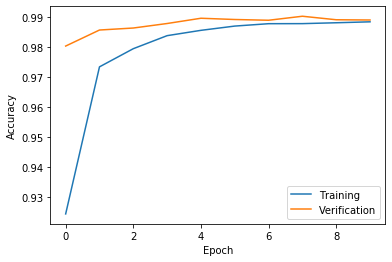

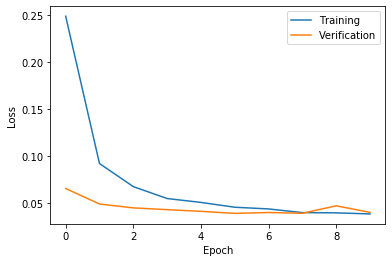

In [8]:
###############################
# 분류 CNN 모델링
###############################
import keras
from keras import models, layers

def CNN(W,H,C , Nout):
        model = models.Sequential()
        model.add(layers.Conv2D(32, kernel_size=(3, 3), 
                                activation='relu', 
                                input_shape=(W,H,C)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(layers.Dropout(0.25))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(Nout, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])
        return model;

##############################################
# Data
##############################################
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    """ 이미지 데이터 X ,  0~9까지 붙인 이름표를 Y   
        70,000개의 데이터 중 60,000개를 학습 데이터로,  10,000개를 테스트 데이터로 읽어옵니다. 
    """

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    """원-핫 인코딩을 위해 케라스의 np_utils 의 to_categorical() 함수를 사용
     0 ~ 9까지의 정수 값을 갖는 형태가 아닌 0 이나 1로 이뤄진 벡터로 수정 
     만약에 '3' 이라는 숫자이라면 [0, 0, 1, 0, 0, 0, 0, 0, 0]으로 변환 
    """

    L, W, H = X_train.shape
    print(L, W, H)  # 60000 28 28

    X_train = X_train.reshape(60000, W, H,-1)
    X_test = X_test.reshape(10000,W, H,-1)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

###############################
# 학습 효과 분석
###############################
import matplotlib.pyplot as plt
%matplotlib inline 

###############################
# 분류 CNN 학습 및 테스트
###############################
def main():
    number_of_class = 10
    Nout = number_of_class

    batch_size = 128
    epochs = 10

    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = CNN(28, 28, 1, Nout)
               # width, hight, color

    history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_split=0.2)

    score = model.evaluate(X_test, Y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    history = history.history

    # 정확도 변화 추이  그래프
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

    # Cost/Loss  변화 추이 그래프
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

if __name__ == '__main__':
    main()